In [1]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [2]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [3]:
from datasets import load_dataset, load_metric
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import pandas as pd
from textblob import TextBlob
from google.colab import drive

In [4]:
nltk.download('stopwords')
stopwords = stopwords.words('english')
sns.set_theme()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
imdb_dataset = load_dataset("imdb")

X_train = imdb_dataset['train']['text']
y_train = imdb_dataset['train']['label']

X_test = imdb_dataset['test']['text']
y_test = imdb_dataset['test']['label']

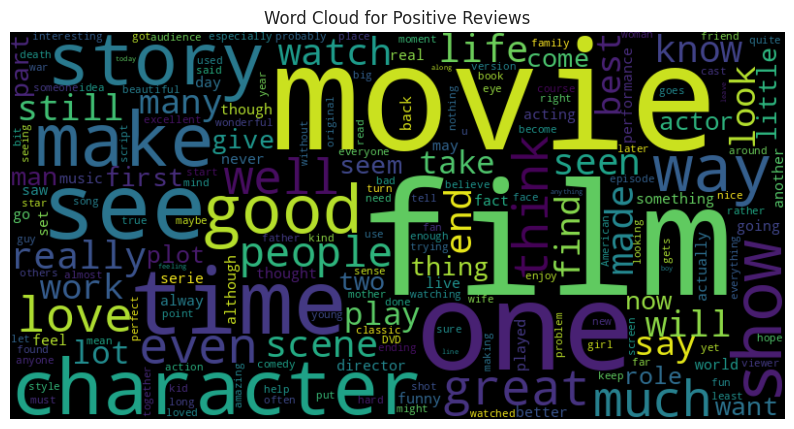

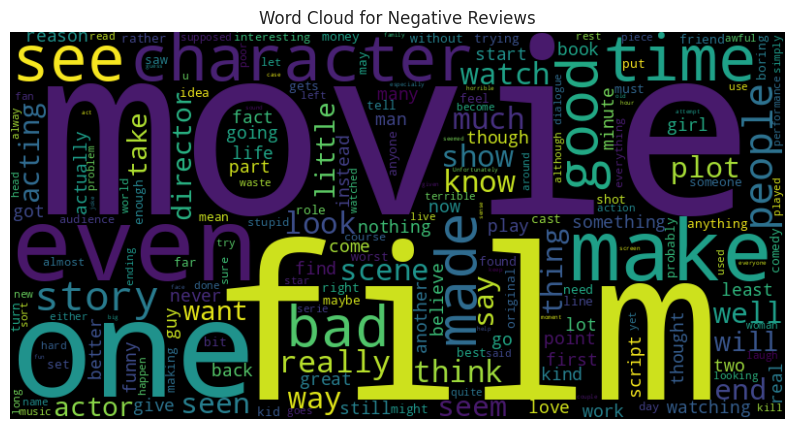

In [12]:
df_train = pd.DataFrame({'text': X_train, 'label': y_train})

df_test = pd.DataFrame({'text': X_test, 'label': y_test})

df_combined = pd.concat([df_train, df_test], ignore_index=True)

def create_word_cloud(texts, title):
    texts_cleaned = [text.replace("br", "") for text in texts]

    all_text_combined = ' '.join(texts_cleaned)

    wordcloud = WordCloud(width=800, height=400, stopwords = STOPWORDS).generate(all_text_combined)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

positive_texts = df_combined[df_combined['label'] == 1]['text']
negative_texts = df_combined[df_combined['label'] == 0]['text']

create_word_cloud(positive_texts, 'Word Cloud for Positive Reviews')
create_word_cloud(negative_texts, 'Word Cloud for Negative Reviews')

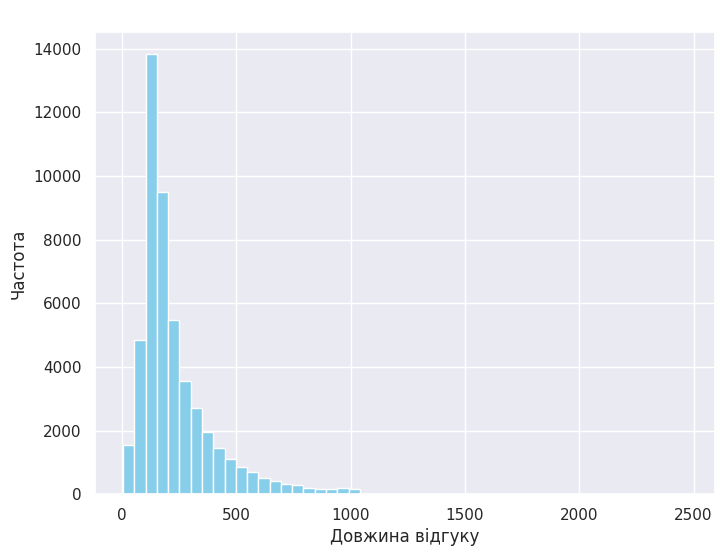

In [13]:
review_lengths = [len(review.split()) for review in df_combined['text']]
plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=50, color='skyblue')
plt.title('Distribution of Review Lengths', color='white')
plt.xlabel('Довжина відгуку')
plt.ylabel('Частота')
plt.show()

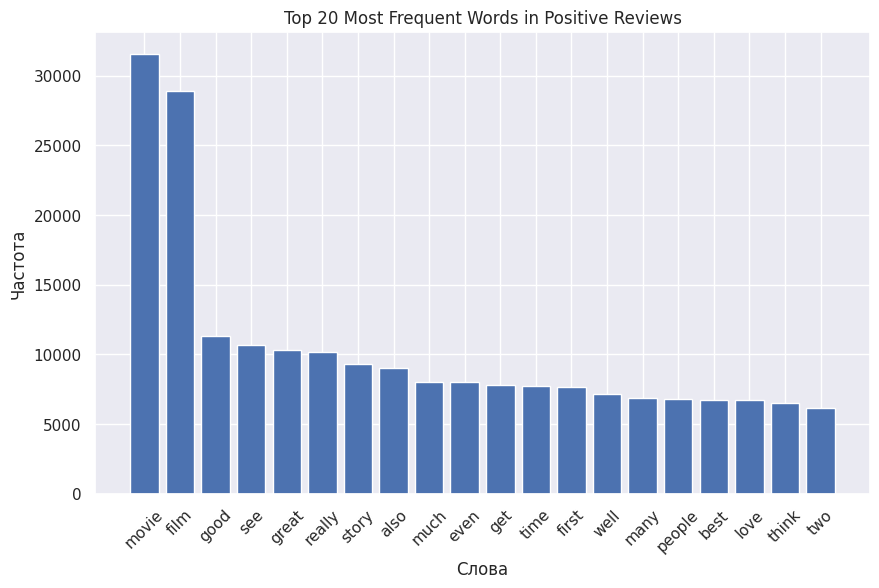

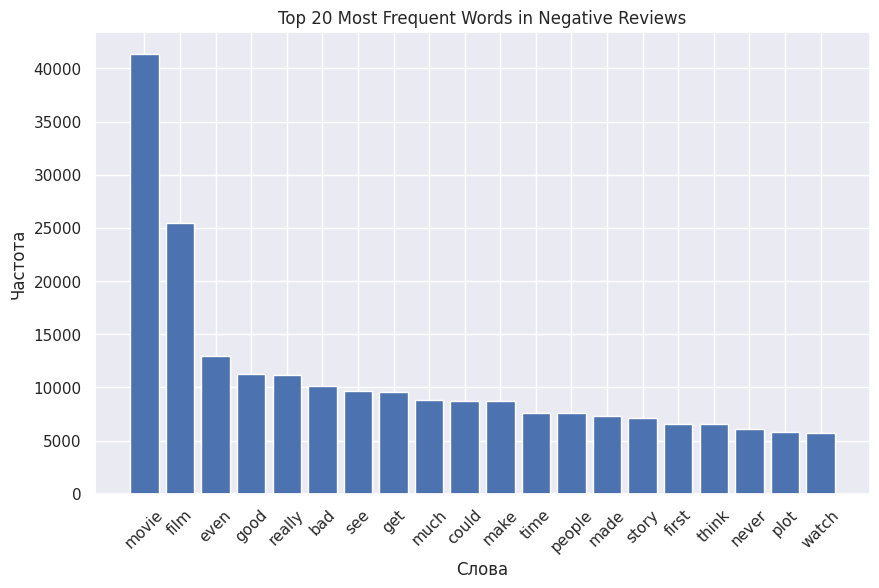

In [15]:
stop_words = set(stopwords)

def plot_word_frequency(texts, title):
    texts_cleaned = [text.replace("br", "").replace("/><", "").replace("/>The", "").replace("-", "").replace("one", "").replace("like", "").replace("would", "").replace("<", "").replace("it.", "").replace("movie.", "movie") for text in texts]

    word_freq = {}
    for text in texts_cleaned:
        for word in text.split():
            if word.lower() not in stop_words:
                if word not in word_freq:
                    word_freq[word] = 1
                else:
                    word_freq[word] += 1
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
    words, frequencies = zip(*sorted_word_freq)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xlabel('Слова')
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequency(positive_texts, 'Top 20 Most Frequent Words in Positive Reviews')
plot_word_frequency(negative_texts, 'Top 20 Most Frequent Words in Negative Reviews')


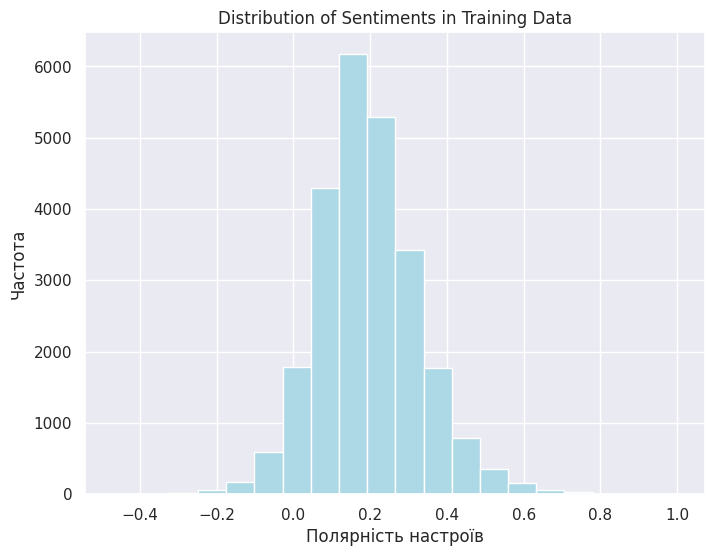

In [17]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

sentiments_train = [analyze_sentiment(text) for text in df_combined[df_combined['label'] == 1]['text']]

plt.figure(figsize=(8, 6))
plt.hist(sentiments_train, bins=20, color='lightblue')
plt.title('Distribution of Sentiments in Training Data')
plt.xlabel('Полярність настроїв')
plt.ylabel('Частота')
plt.show()

In [18]:
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/News_dataset.csv")

In [20]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


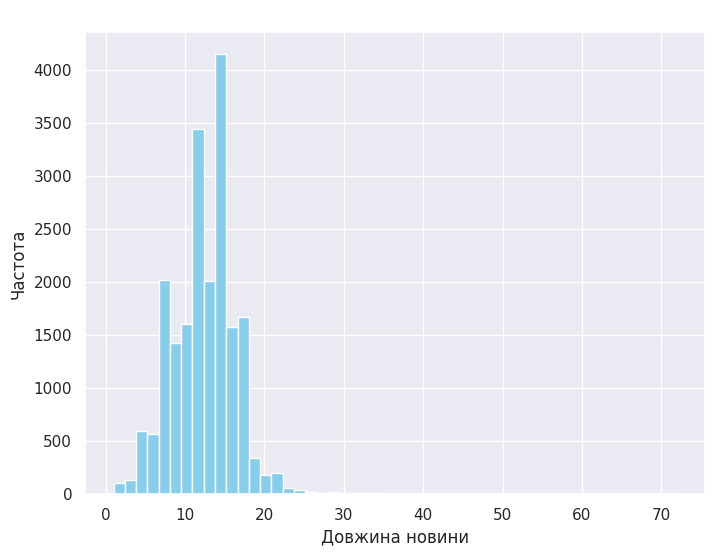

In [21]:
review_lengths = []
for text in df['title']:
    if isinstance(text, str):
        review_lengths.append(len(text.split()))
plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=50, color='skyblue')
plt.title('Distribution of Review Lengths', color='white')
plt.xlabel('Довжина новини')
plt.ylabel('Частота')
plt.show()

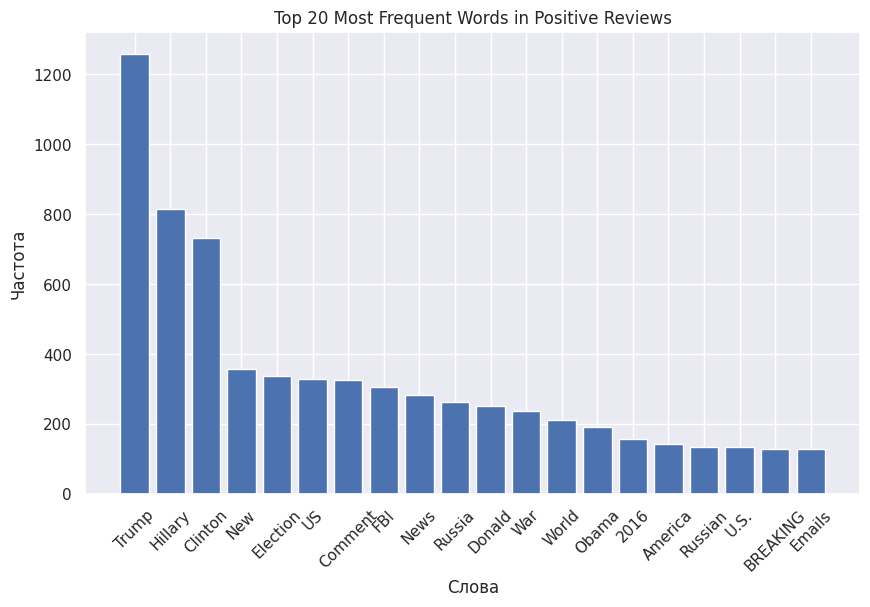

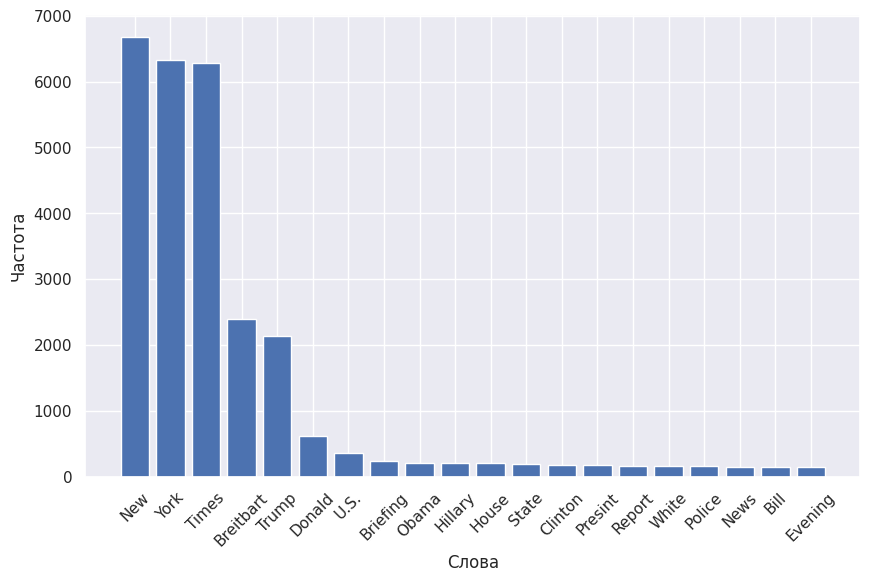

In [22]:
def plot_word_frequency(texts, title):
    texts_cleaned = []
    for text in texts:
        if isinstance(text, str):
            cleaned_text = text.replace("-", "").replace("|", "").replace("&", "").replace("de", "").replace(":", "").replace("Trump’s", "Trump").replace("Trump,", "Trump").replace("–", "").replace("Says", "").replace("movie.", "movie")
            texts_cleaned.append(cleaned_text)
    word_freq = {}
    for text in texts_cleaned:
        if isinstance(text, str):
            for word in text.split():
                if word.lower() not in stop_words:
                    if word not in word_freq:
                        word_freq[word] = 1
                    else:
                        word_freq[word] += 1
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
    words, frequencies = zip(*sorted_word_freq)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xlabel('Слова')
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequency(df[df['label'] == 1]['title'], 'Top 20 Most Frequent Words in Positive Reviews')
plot_word_frequency(df[df['label'] == 0]['title'], '')


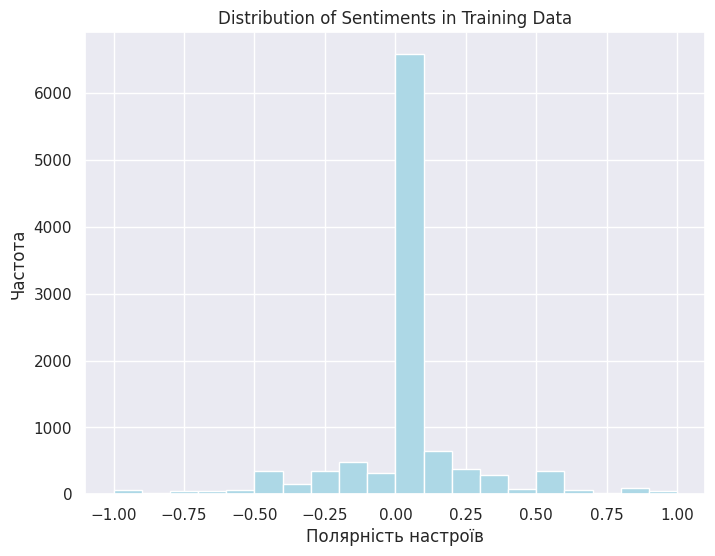

In [33]:
df['title'] = df['title'].fillna('')
df['title'] = df['title'].astype(str)

sentiments_train = [analyze_sentiment(text) for text in df[df['label'] == 1]['title']]

plt.figure(figsize=(8, 6))
plt.hist(sentiments_train, bins=20, color='lightblue')
plt.title('Distribution of Sentiments in Training Data')
plt.xlabel('Полярність настроїв')
plt.ylabel('Частота')
plt.show()